In [2]:
!pip install -r requirements.txt

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

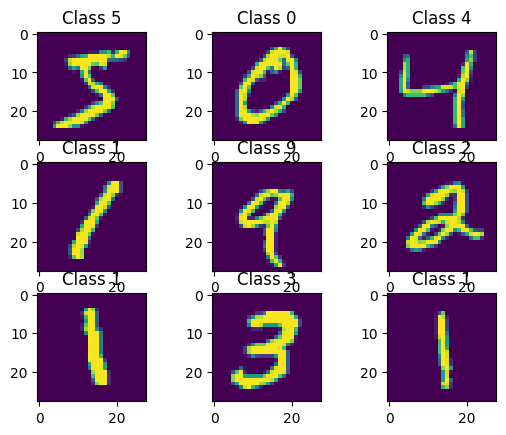

In [5]:
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title("Class {}".format(y_train[i]))

In [6]:
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32')/255

In [7]:
n_class = 10
y_train = to_categorical(y_train, n_class)
y_test = to_categorical(y_test,n_class)

In [8]:
# Define and compile the model
model = Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))  # Input layer
model.add(layers.Dense(128, activation='relu'))  # Hidden layers
model.add(layers.Dense(10, activation='softmax'))  # Output layer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=10, validation_data=(x_test, y_test),verbose=0)

In [10]:
#Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1033 - accuracy: 0.9762
Test accuracy: 0.9761999845504761


In [11]:
accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Score: {:.4f}".format(accuracy[0]))
print("Training Accuracy: {:.4f}".format(accuracy[1]))

Training Score: 0.0160
Training Accuracy: 0.9944


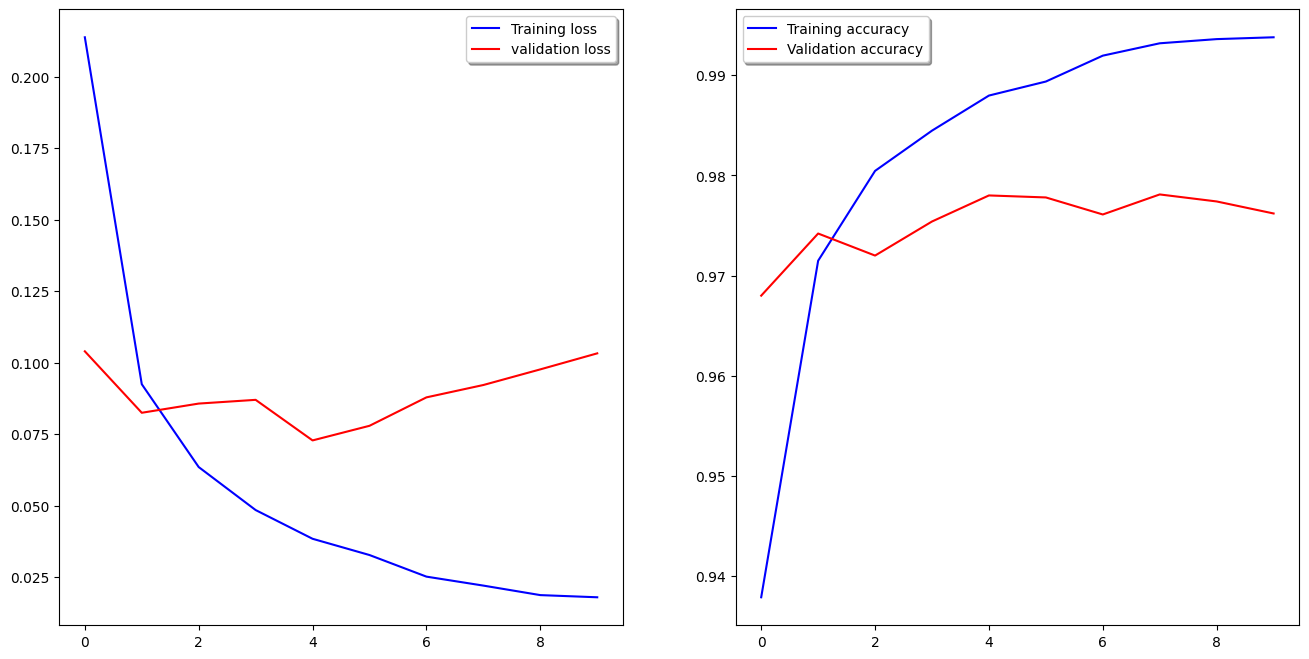

In [12]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss")
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best',shadow=True)

In [13]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [14]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(predictions, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[ 975    0    1    0    0    1    1    1    1    0]
 [   1 1124    4    1    0    0    1    2    2    0]
 [   3    2 1009    4    3    0    0    7    4    0]
 [   0    0    4  995    0    0    0    5    2    4]
 [   1    0    2    0  960    0    3    6    0   10]
 [   4    0    1   30    2  847    3    2    2    1]
 [   3    4    5    1    5    3  936    0    1    0]
 [   0    2    8    1    0    0    0 1012    2    3]
 [   9    0    4   10    5    4    0    4  933    5]
 [   2    2    0    5   12    3    0   12    2  971]]


In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images to a 1D array
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

# Convert class vectors to binary class matrices (one-hot encoding)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Define the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer: Flatten the 28x28 images
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 classes) and softmax activation
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.1)

# Predictions on test and train data
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

# Evaluation metrics and confusion matrix for test data
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

y_pred_test_classes = tf.argmax(y_pred_test, axis=1)
y_test_classes = tf.argmax(y_test_cat, axis=1)

print("Test Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_test_classes))
print("\nTest Classification Report:")
print(classification_report(y_test_classes, y_pred_test_classes))

# Evaluation metrics and confusion matrix for train data
train_loss, train_accuracy = model.evaluate(x_train, y_train_cat)
print(f"\nTrain accuracy: {train_accuracy * 100:.2f}%")

y_pred_train_classes = tf.argmax(y_pred_train, axis=1)
y_train_classes = tf.argmax(y_train_cat, axis=1)

print("Train Confusion Matrix:")
print(confusion_matrix(y_train_classes, y_pred_train_classes))
print("\nTrain Classification Report:")
print(classification_report(y_train_classes, y_pred_train_classes))


Epoch 1/5
1688/1688 [==============================] - 8s 4ms/step - loss: 0.2706 - accuracy: 0.9234 - val_loss: 0.1252 - val_accuracy: 0.9663
Epoch 2/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1180 - accuracy: 0.9651 - val_loss: 0.1060 - val_accuracy: 0.9693
Epoch 3/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0804 - accuracy: 0.9765 - val_loss: 0.0794 - val_accuracy: 0.9760
Epoch 4/5
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0605 - accuracy: 0.9816 - val_loss: 0.0795 - val_accuracy: 0.9757
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0796 - accuracy: 0.9759
Test accuracy: 97.59%
Test Confusion Matrix:
[[ 968    0    2    1    1    0    3    1    2    2]
 [   0 1127    2    1    0    2    2    0    1    0]
 [   5    3 1010    0    1    0    2    5    6    0]
 [   0    0    9  979    0    5    0    5    6    6]
 [   0    0    4    0  969    0    2    1    1    5]
 [   3    0    0   

In [16]:
model.save('mnist_model.keras')

<h1> <center>Gradio </center></h1>

In [17]:
import gradio as gr
import numpy as np
from keras.models import load_model
from PIL import Image
import webbrowser

C:\Users\anoop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
model = load_model('mnist_model.keras') 

In [19]:
def predict_digit(image):
    # Convert Gradio Image to NumPy array
    img_array = np.array(image)
    
    # Convert to grayscale and resize to 28x28 (MNIST model input size)
    img = Image.fromarray(img_array).convert('L').resize((28, 28))
    
    # Convert to NumPy array and normalize
    img = np.array(img).astype('float32') / 255.0
    
    # Reshape to match the model input shape
    img = img.reshape((1, 28, 28, 1))
    
    # Make the prediction
    prediction = model.predict(img)
    
    # Get the predicted digit
    predicted_digit = np.argmax(prediction)

    return str(predicted_digit)

In [20]:
iface = gr.Interface(
    fn=predict_digit,
    inputs=gr.Image(type="pil", height=280, width=280, label="Draw a digit"),
    outputs="text")

In [21]:
iface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [22]:


webbrowser.open('http://127.0.0.1:7860')


True

<h1><center> Streamlit </center></h1>

In [23]:
%%writefile streamlit_app.py

import streamlit as st
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

# Assuming you have a model loaded, replace this with your actual model
model = load_model('mnist_model.keras')

def mnist_digit_classification_app():
    st.title("MNIST Digit Classification App")
    uploaded_file = st.file_uploader("Choose a digit image...", type="jpg", key="file")

    if uploaded_file is not None:
        # Display the uploaded image
        st.image(uploaded_file, caption="Uploaded Image.", use_column_width=True)

        # Preprocess the image for the model
        img = Image.open(uploaded_file)
        img = img.resize((28, 28))
        img = np.array(img)
        img = img.reshape((1, 28, 28, 1)).astype('float32') / 255.0

        # Make prediction
        prediction = model.predict(img)
        predicted_class = np.argmax(prediction)

        st.write("")
        st.write("Classifying...")

        # Display the predicted digit and confidence
        st.write(f"Predicted Digit: {predicted_class}")
        st.write(f"Confidence: {prediction[0][predicted_class]:.2%}")
        
mnist_digit_classification_app()

Overwriting streamlit_app.py


In [24]:
!streamlit run streamlit_app.py

1/1 [==============================] - 0s 243ms/step
^C


Execute the command streamlit run streamlit_app.py from cmd to launch app.

<h1><center>Flask</center></h1>

In [ ]:
import os
import flask
from flask import Flask, render_template, request, jsonify
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
from io import BytesIO
import base64

# Create the 'templates' directory if it doesn't exist
directory_path = 'templates'
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Write the 'index.html' file within the 'templates' directory
with open(os.path.join(directory_path, 'index.html'), 'w') as file:
    file.write("""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>MNIST Digit Recognition</title>
    <style>
        body {
            font-family: 'Arial', sans-serif;
            background: url('https://codetheweb.blog/assets/img/posts/css-advanced-background-images/cover.jpg');
            margin: 0;
            display: flex;
            flex-direction: column;
            align-items: center;
            justify-content: center;
            height: 100vh;
        }
        
        h1 {
            color: #333;
            font-size: 40px;
            text-align: center;
            font-weight: 1000;
            margin-bottom: auto;
        }
        
        #canvas {
            border: 15px solid #333;
            background-color: #000000;
            cursor: pointer;
            margin: 20px 100;
        }
        
        button {
            padding: 15px 50px;
            font-size: 20px;
            background-color: #182b98;
            color: #fff;
            border: none;
            cursor: pointer;
            border-radius: 8px;
            margin-top: 30px;
        }
        
        button:hover {
            background-color: #45a049;
        }
        
        #prediction-result {
            margin-top: 20px;
            font-size: 30px;
            color: #4cd50c;
            border: 10px solid #333;
            background-color: #334;
            border-radius: 15px;
        }
        
        section { 
            margin: auto;
        }
    </style>

</head>
<body>
    <section>
        <h1>MNIST Digit Recognition</h1>
    </section>
    <section>
        <canvas id="canvas" width="280" height="280"></canvas>
    </section>
    <section>
        <form id="prediction-form">
            <button type="button" onclick="predictDigit()">Predict</button>
        </form>
    </section>
    <section>
        <div id="prediction-result"></div>
    </section>

    <script>
        var canvas = document.getElementById("canvas");
        var ctx = canvas.getContext("2d");
        var drawing = false;

        // Set white color for drawing
        ctx.strokeStyle = "#fff";
        ctx.fillStyle = "#fff";

        canvas.addEventListener("mousedown", function (e) {
            drawing = true;
            ctx.lineWidth = 18;
            ctx.lineCap = "round";
            ctx.beginPath();
            ctx.moveTo(e.clientX - canvas.offsetLeft, e.clientY - canvas.offsetTop);
        });

        canvas.addEventListener("mousemove", function (e) {
            if (!drawing) return;
            ctx.lineTo(e.clientX - canvas.offsetLeft, e.clientY - canvas.offsetTop);
            ctx.stroke();
        });

        canvas.addEventListener("mouseup", function () {
            drawing = false;
        });

        function predictDigit() {
            var smallCanvas = document.createElement("canvas");
            var smallCtx = smallCanvas.getContext("2d");
            smallCanvas.width = 28;
            smallCanvas.height = 28;
            smallCtx.drawImage(canvas, 0, 0, 28, 28);
        
            var dataURL = smallCanvas.toDataURL();
            var formData = new FormData();
            formData.append("image", dataURL);
        
            // Clear the canvas
            clearCanvas();
        
            fetch("/predict", {
                method: "POST",
                body: formData
            })
            .then(response => response.json())
            .then(data => {
                console.log(data); // Log the response for debugging
                if (data.result !== undefined) {
                    document.getElementById("prediction-result").innerText = "Predicted Digit: " + data.result;
                } else {
                    document.getElementById("prediction-result").innerText = "Prediction failed. Please try again.";
                }
            })
            .catch(error => {
                console.error("Error:", error);
                document.getElementById("prediction-result").innerText = "Error occurred during prediction.";
            });
        }

        // Function to clear the canvas
        function clearCanvas() {
            ctx.clearRect(0, 0, canvas.width, canvas.height);
        }
    </script>
</body>
</html>
""")


In [ ]:
%%writefile app.py

from flask import Flask, render_template, request, jsonify
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
from io import BytesIO
import base64

app = Flask(__name__)

# Load the pre-trained model
model = load_model('mnist_model.keras')

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get the image data from the request
        data_url = request.form['image']
        header, encoded = data_url.split(",", 1)
        image_data = BytesIO(base64.b64decode(encoded))

        # Read the image
        img = image.load_img(image_data, target_size=(28, 28), color_mode="grayscale")

        # Convert the image to a numpy array
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  

        # Make a prediction
        prediction = model.predict(img_array)

        # Get the predicted digit
        predicted_digit = np.argmax(prediction)

        return jsonify({'result': str(predicted_digit)})
    
    except Exception as e:
        print("Error:", str(e))
        return jsonify({'error': str(e)})



if __name__ == '__main__':
    app.run(debug=True)



Overwriting app.py


run  python Flask.py in cmd to execute.

In [ ]:
!python app.py